<div style="text-align: center;"> <h3>Data Mining and Wrangling</h3>
<h5>Summative Assessment 6</h5>
<h5>May 7, 2025</h5>    
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

# Capstone Project:
## Title:  Predicting Customer Churn with Regression-Based and Tree-Based Methods

Objective: Use the Orange Telecom Churn Dataset to build and evaluate machine learning models that predict whether a customer will churn. Apply both regression-based and tree-based methods and compare their performance.

### Load
Import the dataset into R or Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("churn-bigml-80.csv")
print(df_train.shape)
df_train.head()

(2666, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


About the Dataset:

The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models. Two datasets are made available here: The churn-80 and churn-20 datasets can be downloaded above.

The two sets are from the same batch, but have been split by an 80/20 ratio. As more data is often desirable for developing ML models, let's use the larger set (that is, churn-80) for training and cross-validation purposes, and the smaller set (that is, churn-20) for final testing and model performance evaluation.

In [3]:
print(df_train.info())
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [363]:
df_train.agg(['dtypes','nunique', 'unique']).T

,dtypes,nunique,unique
State,object,51,"[KS, OH, NJ, OK, AL, MA, MO, WV, RI, IA, MT, I..."
Account length,int64,205,"[128, 107, 137, 84, 75, 118, 121, 147, 141, 74..."
Area code,int64,3,"[415, 408, 510]"
International plan,object,2,"[No, Yes]"
Voice mail plan,object,2,"[Yes, No]"
Number vmail messages,int64,42,"[25, 26, 0, 24, 37, 27, 33, 39, 41, 28, 30, 34..."
Total day minutes,float64,1489,"[265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 218..."
Total day calls,int64,115,"[110, 123, 114, 71, 113, 98, 88, 79, 84, 127, ..."
Total day charge,float64,1489,"[45.07, 27.47, 41.38, 50.9, 28.34, 37.98, 37.0..."
Total eve minutes,float64,1442,"[197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 348...."


## Exploration

In [4]:
sns.set_theme()
plt.rcParams['figure.facecolor'] = 'lightgrey'
plt.rcParams['axes.facecolor'] = 'lightgrey'

### Missing Data

In [5]:
df_train.isna().sum().sum()

0

### Data type

In [6]:
df_train.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [7]:
del df_train['State']

In [8]:
df_train.nunique() 

Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

#### Categorical

In [361]:
mask = df_train.nunique() <= 21
discrete = df_train.loc[:,mask].agg(['unique', 'nunique', 'dtypes']).T
discrete

,unique,nunique,dtypes
Area code,"[415, 408, 510]",3,int64
International plan,"[No, Yes]",2,object
Voice mail plan,"[Yes, No]",2,object
Total intl calls,"[3, 5, 7, 6, 2, 4, 19, 10, 9, 15, 8, 1, 11, 0,...",21,int64
Customer service calls,"[1, 0, 2, 3, 4, 5, 7, 9, 6, 8]",10,int64
Churn,"[False, True]",2,bool


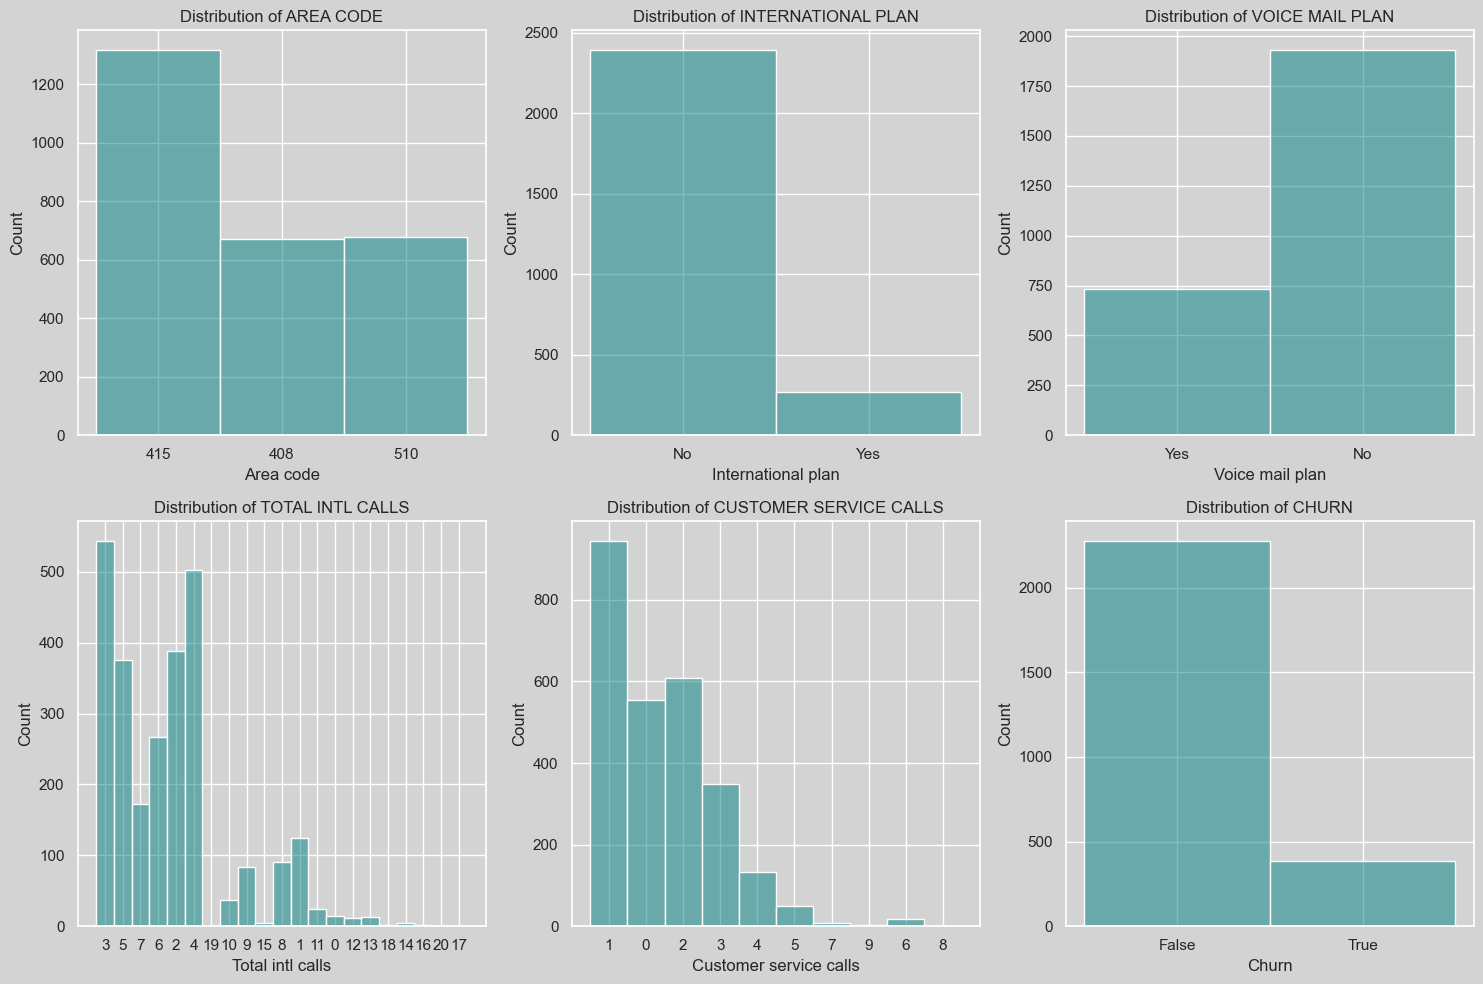

In [10]:
fig,ax = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
ax = ax.flatten()

cats = discrete.index

for i, col in enumerate(cats):
    sns.histplot(
        df_train[col].astype(str),
        ax=ax[i],
        alpha=0.5,
        color="teal"
    )

    ax[i].set_title(f"Distribution of {col.upper()}")

plt.tight_layout()

Every categorical variables are disproportionately distributed.  The `Churn` is especially concerning given that it will be the response. With that in mind, it's necessary to subjec the dataset to sampling technique. 

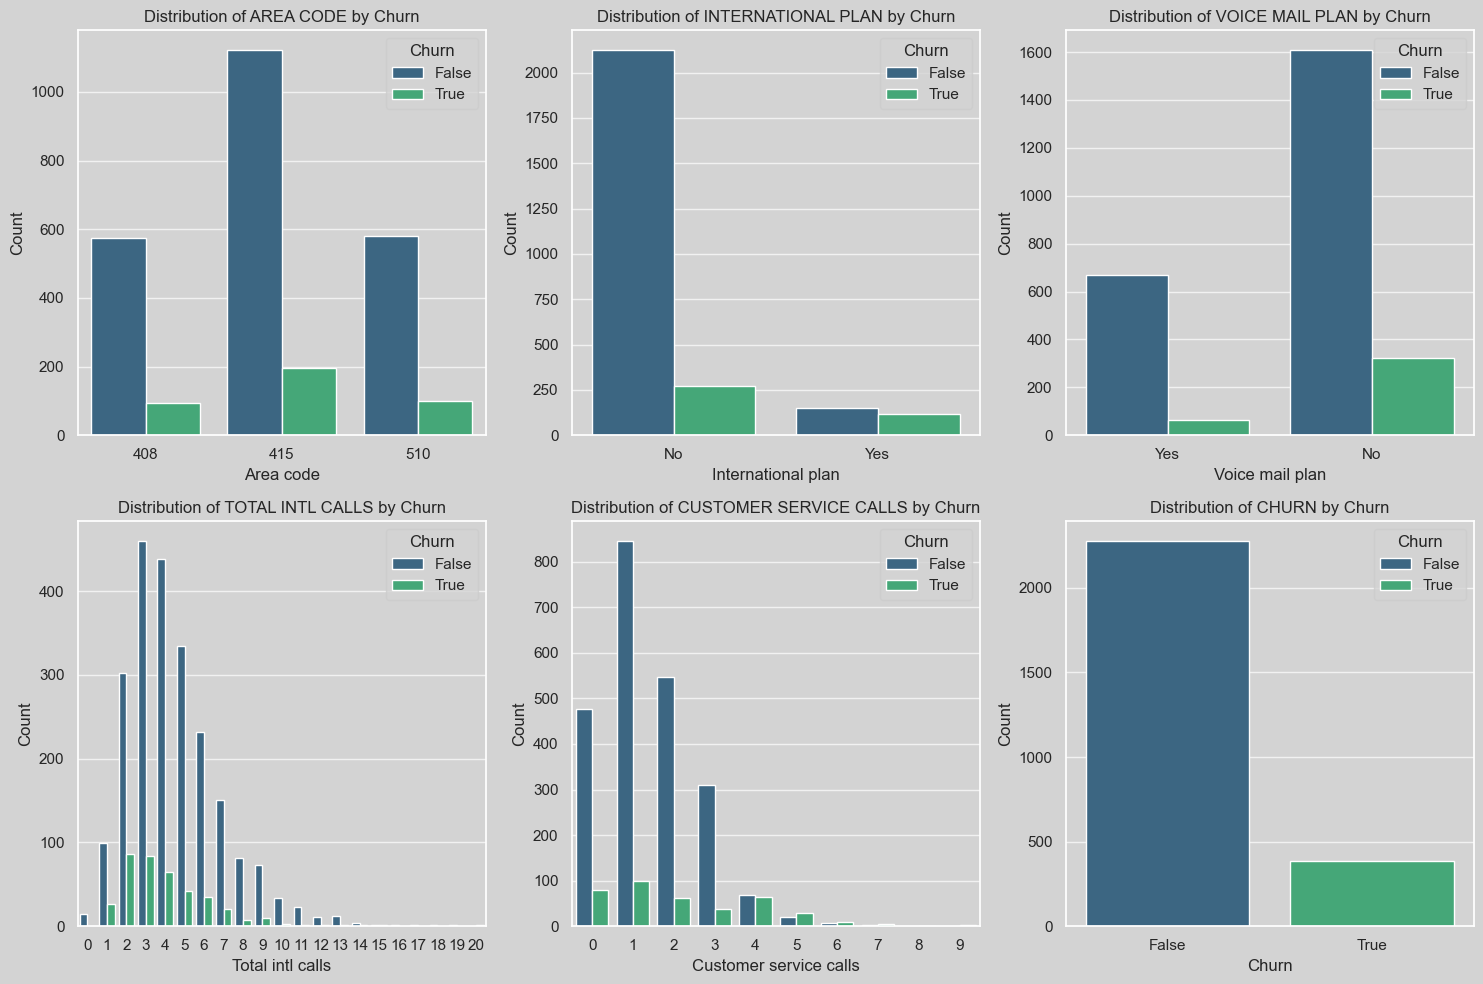

In [11]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(15,10))
response = "Churn"

axes = axes.flatten()

for i, col in enumerate(cats):
    sns.countplot(
        ax=axes[i],
        x=col, 
        hue=response,
        data=df_train, 
        palette='viridis')

    axes[i].set_title(f'Distribution of {col.upper()} by Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].grid(axis='y', linestyle='-', alpha=0.7) 

plt.tight_layout()


Even the distribution grouped by the response variable are imbalanced. 

Aside from that, I think `International plan`, particularly the "Yes" have a noticable relation to churners.


Looking at the `Total intl calls` and `Customer service calls`, there are some rarer categories. This might be problematic in a sense that they may pose as a *pseudo-outliers*. For that reason, it is wise if the rarers ones will be grouped together.

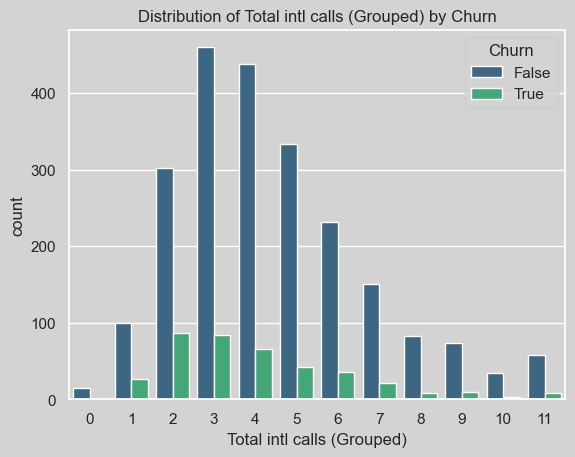

In [12]:
df_train_cats = df_train[cats].copy() 

def grouped(X, threshold):
    if X >= threshold:
        return threshold
    else:
        return X
    
df_train_cats['total_int_calls_grouped'] = df_train_cats['Total intl calls'].apply(lambda x: grouped(x, 11))

sns.countplot(
        x='total_int_calls_grouped', 
        hue=response,
        data=df_train_cats, 
        palette='viridis')
plt.title('Distribution of Total intl calls (Grouped) by Churn')
plt.xlabel("Total intl calls (Grouped)");

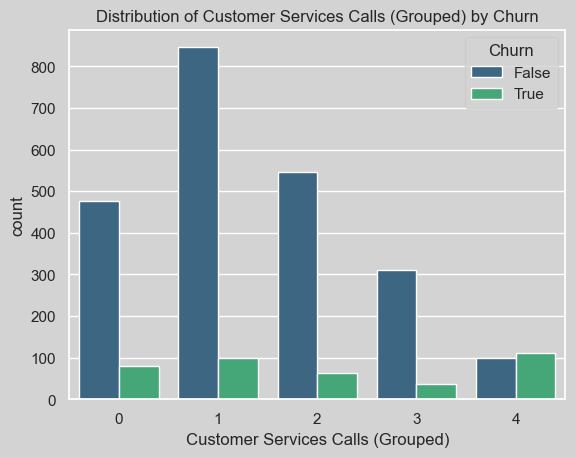

In [13]:
df_train_cats['customer_service_calls_grouped'] = df_train_cats['Customer service calls'].apply(lambda x: grouped(x, 4))

sns.countplot(
        x='customer_service_calls_grouped', 
        hue=response,
        data=df_train_cats, 
        palette='viridis')

plt.title('Distribution of Customer Services Calls (Grouped) by Churn')
plt.xlabel("Customer Services Calls (Grouped)");

In [14]:
del df_train_cats['Customer service calls']
del df_train_cats['Total intl calls']

### Continous

In [15]:
mask_out = mask == False
conts = df_train.loc[:,mask_out].columns

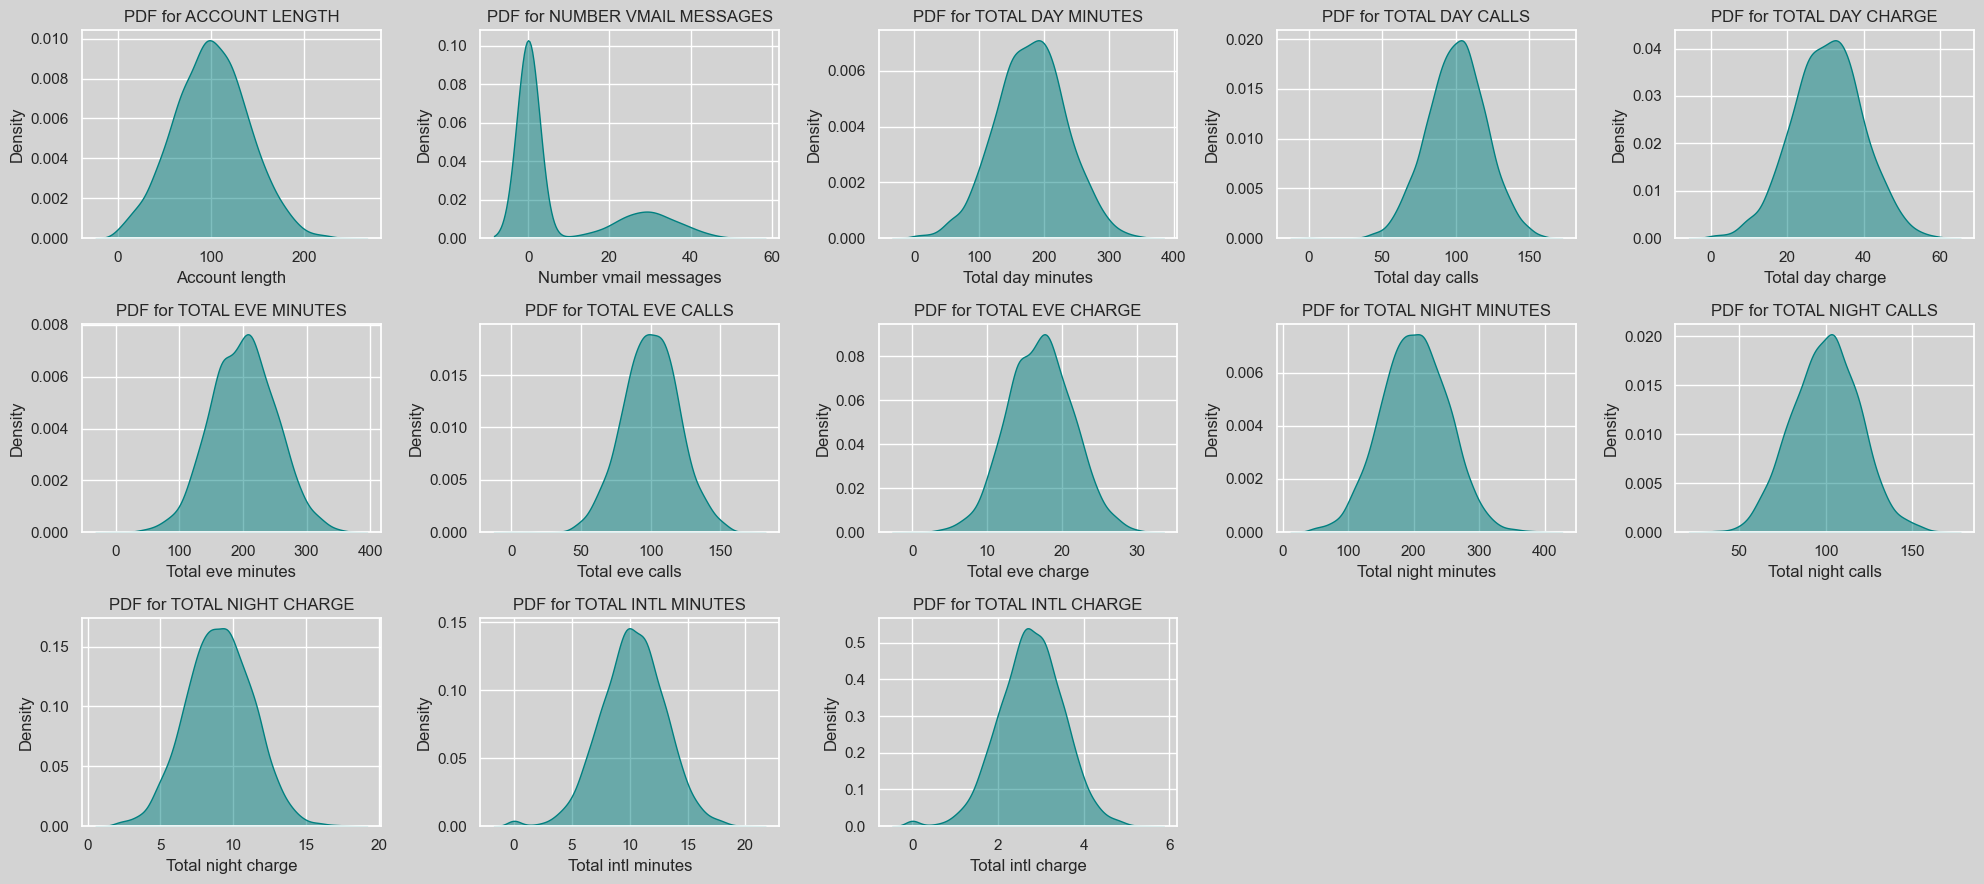

In [366]:
rows = int(np.ceil(len(conts)/5))
fig, ax = plt.subplots(ncols=5,nrows=rows, figsize=(20,3*rows))

ax = ax.flatten()

for i,col in enumerate(conts):
    sns.kdeplot(
        df_train[col],
        fill=True,
        color="teal",
        alpha=0.5,
        ax = ax[i]
    )

    ax[i].set_title(f"PDF for {col.upper()}")

for i in range(len(ax)):
    if  i >= len(conts):
        plt.delaxes(ax[i])

plt.tight_layout()


All are normally distributed, aside from `Number of vmail messages` which is rightly skewed and bimodal.

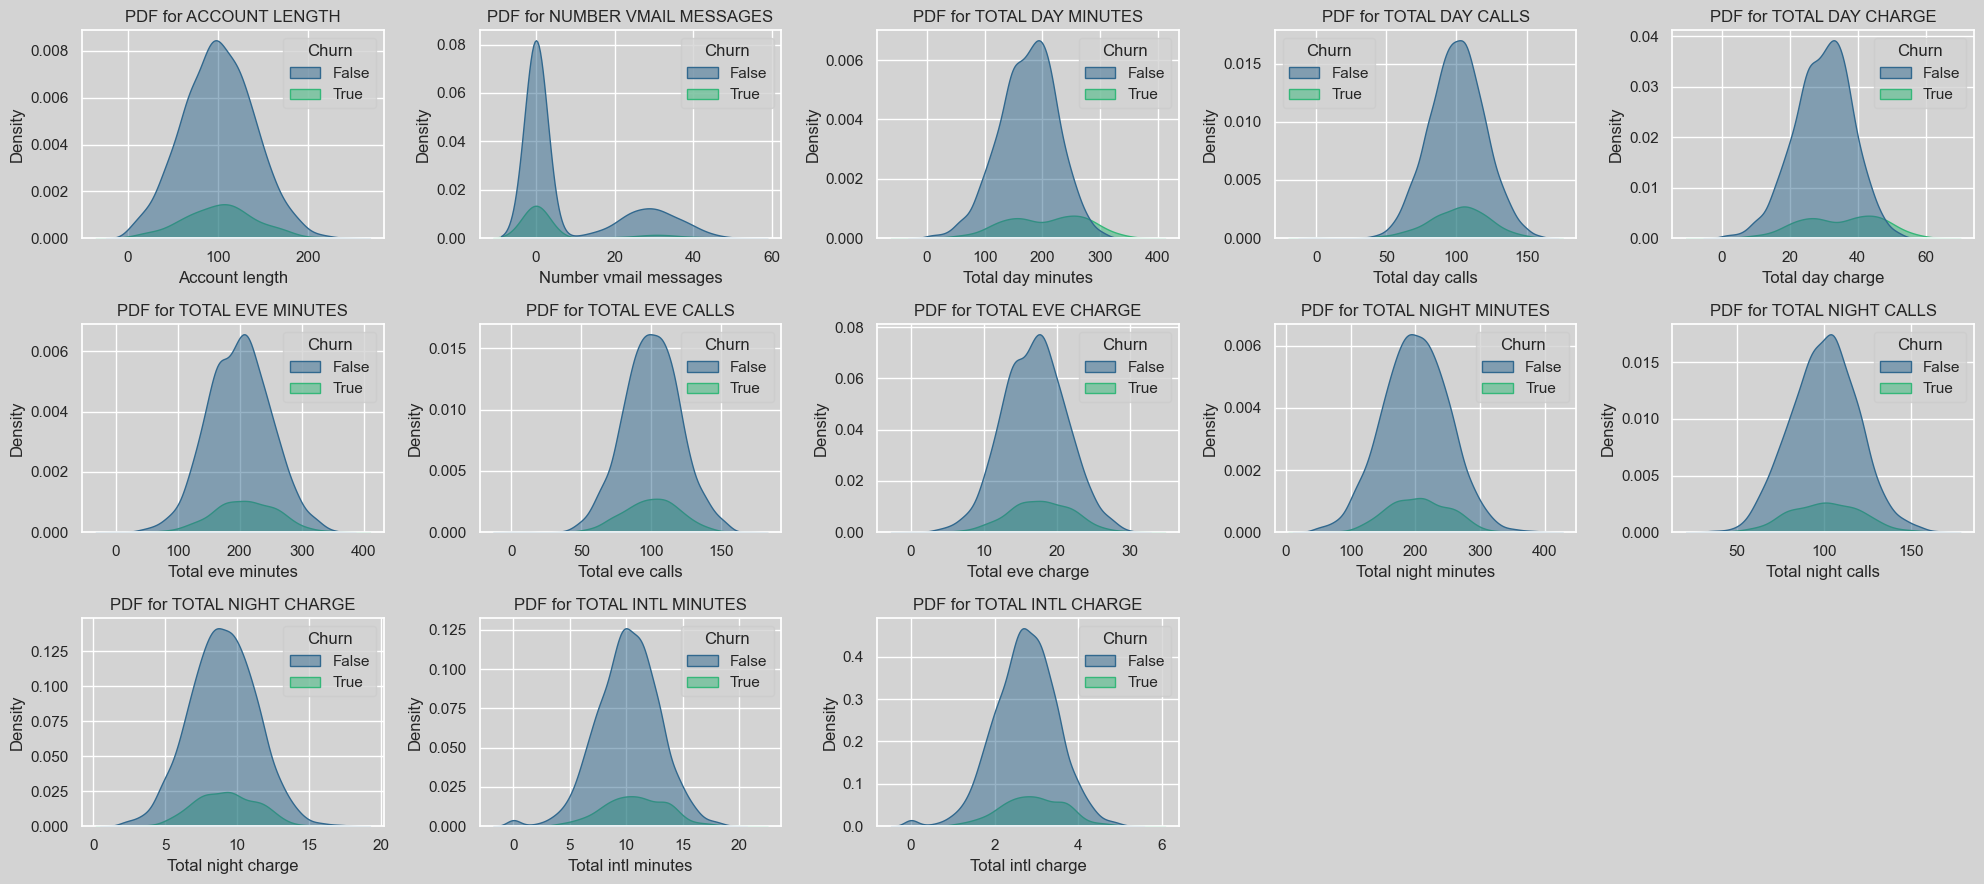

In [ ]:
rows = int(np.ceil(len(conts)/5))
fig, ax = plt.subplots(ncols=5,nrows=rows, figsize=(20,3*rows))

ax = ax.flatten()

for i,col in enumerate(conts):
    sns.kdeplot(
        df_train,
        x=col,
        fill=True,
        color="teal",
        alpha=0.5,
        ax = ax[i],
        hue=response,
        palette="viridis"
    )

    ax[i].set_title(f"PDF for {col.upper()}")

for i in range(len(ax)):
    if  i >= len(conts):
        plt.delaxes(ax[i])
        
plt.tight_layout()

### Outliers

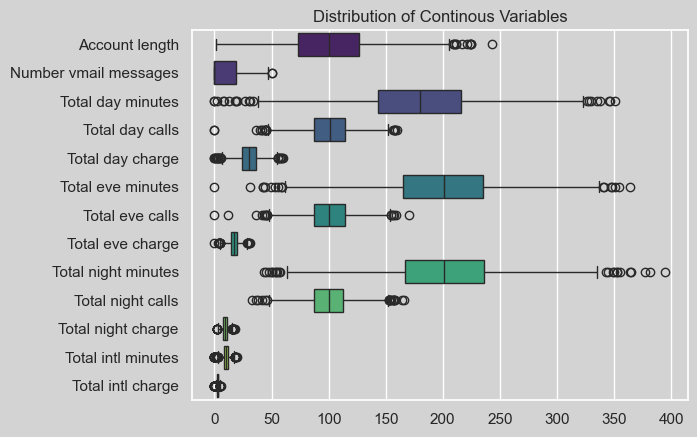

In [18]:
sns.boxplot(
    df_train[conts],
    orient="h",
    palette="viridis"
)

plt.title("Distribution of Continous Variables");

There are some noticable outliers. Let's test those out.

In [19]:
def detect_outliers(data, mult=1.5, normalized=True):
    '''Count the outliers using iqr'''
    lower, upper = data.quantile([0.25,0.75])

    iqr = upper - lower

    lower_bound, upper_bound = lower - iqr*mult, upper + iqr*mult

    outliers = len(data) - (data.between(lower_bound, upper_bound)).sum()
    if not normalized:
        return outliers
    else:
        return outliers / len(data)
    
df_train[conts].apply(lambda X: detect_outliers(X, mult=1.5), axis=0)

Account length           0.004501
Number vmail messages    0.000750
Total day minutes        0.007877
Total day calls          0.006752
Total day charge         0.007877
Total eve minutes        0.006377
Total eve calls          0.005626
Total eve charge         0.006377
Total night minutes      0.008252
Total night calls        0.007127
Total night charge       0.008252
Total intl minutes       0.013878
Total intl charge        0.015004
dtype: float64

The maximum number of outlier is 1.5%. We can just drop those.

In [20]:
def mask_out_outliers(data, mult=1.5):
    '''Count the outliers using iqr'''
    lower, upper = data.quantile([0.25,0.75])

    iqr = upper - lower

    lower_bound, upper_bound = lower - iqr*mult, upper + iqr*mult

    mask = data.between(lower_bound, upper_bound)
    
    return mask
    

In [21]:
mask = mask_out_outliers(df_train['Total intl charge'])
mask_compliment = mask == False
count_out = len(df_train[mask_compliment])
print("Number of outliers dropped:", count_out)
df_train[mask][conts].apply(lambda X: detect_outliers(X, mult=1.5), axis=0)

Number of outliers dropped: 40


Account length           0.004189
Number vmail messages    0.000762
Total day minutes        0.007997
Total day calls          0.006855
Total day charge         0.007997
Total eve minutes        0.006093
Total eve calls          0.005712
Total eve charge         0.006093
Total night minutes      0.008378
Total night calls        0.006855
Total night charge       0.008378
Total intl minutes       0.000000
Total intl charge        0.000000
dtype: float64

The remaining outliers are safe to keep since all of them are about less than 1%. Also, some outliers may still contain key information. Completely eliminating them makes the model unfamilliar with such data and thus less robust.

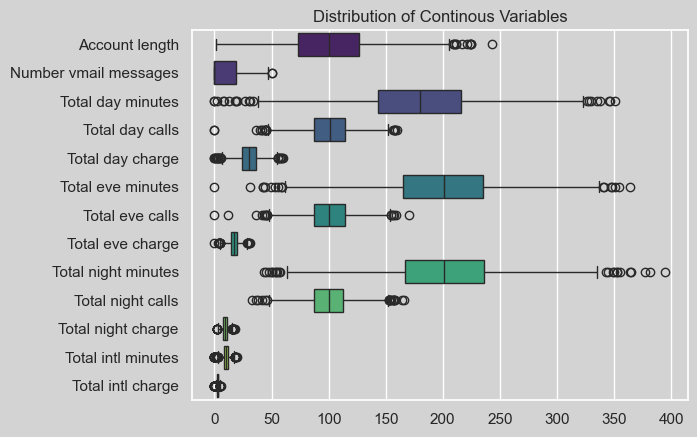

In [22]:
sns.boxplot(
    df_train[conts],
    orient="h",
    palette="viridis"
)

plt.title("Distribution of Continous Variables");

In [23]:
df_train_clean = pd.concat([df_train_cats, df_train[mask][conts]], axis=1)
df_train_clean.dtypes

Area code                           int64
International plan                 object
Voice mail plan                    object
Churn                                bool
total_int_calls_grouped             int64
customer_service_calls_grouped      int64
Account length                    float64
Number vmail messages             float64
Total day minutes                 float64
Total day calls                   float64
Total day charge                  float64
Total eve minutes                 float64
Total eve calls                   float64
Total eve charge                  float64
Total night minutes               float64
Total night calls                 float64
Total night charge                float64
Total intl minutes                float64
Total intl charge                 float64
dtype: object

In [368]:
from sklearn.preprocessing import StandardScaler


def mask_out_outliers(data, mult=1.5):
    '''Count the outliers using iqr'''
    lower, upper = data.quantile([0.25,0.75])

    iqr = upper - lower

    lower_bound, upper_bound = lower - iqr*mult, upper + iqr*mult

    mask = data.between(lower_bound, upper_bound)
    
    return mask


def grouped(X, threshold):
    if X >= threshold:
        return threshold
    else:
        return X

def wrangle(data, transformer=None):
    
    train_mode = transformer==None
    
    df_data = data.copy()

    df_data.drop(columns='State', inplace=True, errors="ignore")

    mask = df_data.nunique() > 21

    conts = df_data.loc[:,mask].columns

    discrete = df_data.loc[:,-mask].columns

    df_data['total_int_calls_grouped'] = df_data['Total intl calls'].apply(lambda x: grouped(x, 11))

    df_data['customer_service_calls_grouped'] = df_data['Customer service calls'].apply(lambda x: grouped(x, 4))

    mapping = {
        "No": 0,
        "Yes" : 1
    }

    df_data['International plan'] = df_data['International plan'].map(mapping)

    df_data['Voice mail plan'] = df_data['Voice mail plan'].map(mapping)

    df_data['Churn'] = df_data['Churn'].astype(int)

    if train_mode:
        mask = mask_out_outliers(df_data['Total intl charge'])
        df_data= df_data[mask]
        
        transformer = StandardScaler()
        X_scaled_data = transformer.fit_transform(df_data[conts])
        X_scaled_df = pd.DataFrame(X_scaled_data, columns=conts, index=df_data[conts].index)
    
    
    df_final = pd.concat([X_scaled_df, df_data[discrete]], axis=1)

    df_final.drop(columns=['Customer service calls', 'Total intl calls'], inplace=True, errors="ignore")

    return df_final
    

In [369]:
df_train = pd.read_csv("churn-bigml-80.csv")

df_train_clean = wrangle(df_train)
print("Shape before:", df_train.shape)
print("Shape after:", df_train_clean.shape)

Shape before: (2666, 20)
Shape after: (2626, 17)


In [26]:
df_train

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


### Correlation

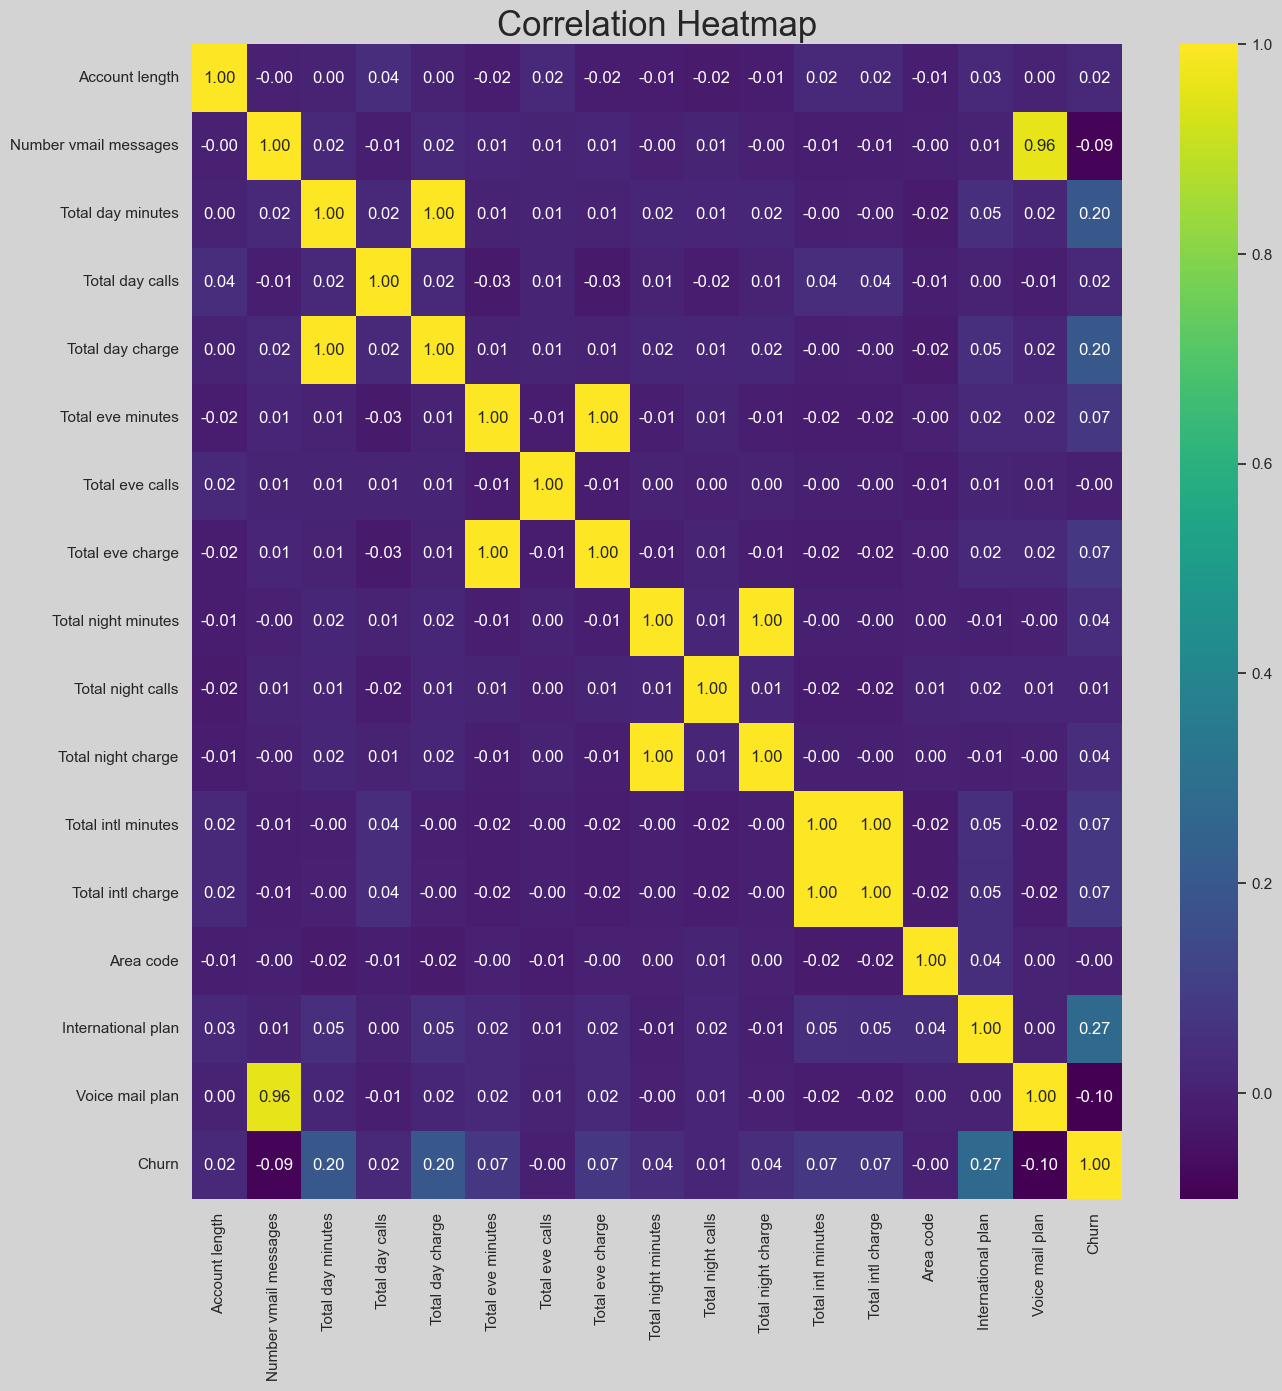

In [371]:
plt.figure(figsize=(15,15))

sns.heatmap(
    df_train_clean.corr(),
    annot=True,
    cmap="viridis",
    fmt = ".2f"
)

plt.title("Correlation Heatmap", size=25);

It appears that the `Total minutes` are perfectly correlated to `Total Charges` so we can drop any of these two. 

Also, `Number vmail messages` is highly correlated to `Voice mail plan` with 0.96 correlation. Let's drop `Voice mail plan` since it's correlation is lower (-0.09) than that of `Number vmail messages` (-0.10) to the response varibale `Churn`.

In [28]:
def grouped(X, threshold, more=True):
    if more:
        if X >= threshold:
            return threshold
        else:
            return X
    else:
        if X <= threshold:
            return threshold
        else:
            return X
    

def wrangle(data, transformer=None):
    
    train_mode = transformer==None
    
    df_data = data.copy()

    df_data.drop(columns=['State'], inplace=True, errors="ignore")

    mask = df_data.nunique() > 21

    conts = df_data.loc[:,mask].columns

    discrete = df_data.loc[:,-mask].columns.to_list()

    if train_mode:
        mask = mask_out_outliers(df_data['Total intl charge'])
        df_data= df_data[mask]
        
        transformer = StandardScaler()
        X_scaled_data = transformer.fit_transform(df_data[conts])
        X_scaled_df = pd.DataFrame(X_scaled_data, columns=conts, index=df_data[conts].index)
    
    else:
        X_scaled_data = transformer.transform(df_data[conts])
        X_scaled_df = pd.DataFrame(X_scaled_data, columns=conts, index=df_data[conts].index)

    
    
    df_data['total_int_calls'] = df_data['Total intl calls'].apply(lambda x: grouped(x, 11))

    df_data['total_int_calls'] = df_data['total_int_calls'].apply(lambda x: grouped(x, 1, more=False))
    
    total_int_calls = pd.get_dummies(df_data['total_int_calls'], 
                                     prefix="total_int_calls",
                                     prefix_sep="=",
                                     drop_first=True,
                                     dtype=int).rename(
                                         {"total_int_calls=11" : "total_int_calls>=11",
                                          "total_int_calls=1" : "total_int_calls<=1"}, 
                                         axis=1)
    
    
    df_data['customer_service_calls'] = df_data['Customer service calls'].apply(lambda x: grouped(x, 4))
    customer_service_calls = pd.get_dummies(df_data['customer_service_calls'], 
                                            prefix="customer_service_calls",
                                            prefix_sep="=",
                                            drop_first=True,
                                            dtype=int).rename(
                                                {"customer_service_calls=4" : "customer_service_calls>=4"}, 
                                                axis=1)

    mapping = {
        "No": 0,
        "Yes" : 1
    }

    df_data['International plan'] = df_data['International plan'].map(mapping)

    df_data['Voice mail plan'] = df_data['Voice mail plan'].map(mapping)

    df_data['Churn'] = df_data['Churn'].astype(int)

    df_final = pd.concat([X_scaled_df, df_data[discrete], total_int_calls, customer_service_calls], axis=1)

    to_drop = ['Customer service calls', 
               'Total intl calls', 
               'Voice mail plan',
               'Total day charge',
               'Total eve charge', 
               'Total night charge']

    df_final.drop(columns=to_drop, inplace=True, errors="ignore")

    return df_final, transformer
    

In [29]:
df_train = pd.read_csv("churn-bigml-80.csv")

df_train_clean, transformer = wrangle(df_train)
print("Shape before:", df_train.shape)
print("Shape after:", df_train_clean.shape)

Shape before: (2666, 20)
Shape after: (2626, 27)


In [30]:
df_test = pd.read_csv("churn-bigml-20.csv")

df_test_clean, _ = wrangle(df_test, transformer)
print("Shape before:", df_test.shape)
print("Shape after:", df_test_clean.shape)

Shape before: (667, 20)
Shape after: (667, 27)


## Baseline

In [32]:
class_count = df_test_clean[response].value_counts(normalize=True).sort_values(ascending=False)
class_count

Churn
0    0.857571
1    0.142429
Name: proportion, dtype: float64

In [33]:
baseline = class_count.iloc[0]
print("Majority Class will be the baseline:", baseline)

Majority Class will be the baseline: 0.8575712143928036


---


## Resampling

In [ ]:
from imblearn.combine import SMOTEENN

response="Churn"

X_train, y_train = df_train_clean.drop(columns=response), df_train_clean[response]

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

## Model Building

### Base Model

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


model = LogisticRegression(max_iter=5000)

param_grid = [
    {
        'solver': ['newton-cg', 'sag'],
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'solver': ['newton-cg', 'sag'],
        'penalty': [None]
    },
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
     {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0.2, 0.5, 0.8]
    },
    {
        'solver': ['saga'],
        'penalty': [None]
    }
]

grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1)

grid_search.fit(X_resampled, y_resampled)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_model_logis = grid_search.best_estimator_

Fitting 5 folds for each of 45 candidates, totalling 225 fits
{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.8799502415358779


In [42]:
import pickle

with open("logis-model.pkl", "wb") as f:
    pickle.dump(best_model_logis, f)

In [65]:
with open("logis-model.pkl", "rb") as f:
    best_model_logis = pickle.load(f)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report



model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy'],
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

print("Starting Grid Search...")
grid_search.fit(X_resampled, y_resampled)
print("Grid Search Complete.")

print("\nBest parameters found:")
print(grid_search.best_params_)

print("\nBest cross-validation score (on training data folds):")
print(grid_search.best_score_)

best_model_tree = grid_search.best_estimator_

test_score = best_model_tree.score(X_test, y_test)
print(f"\nScore on the test set: {test_score:.4f}")

y_pred = best_model_tree.predict(X_test)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

Starting Grid Search...
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Grid Search Complete.

Best parameters found:
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best cross-validation score (on training data folds):
0.9409806563970726

Score on the test set: 0.8201

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       572
           1       0.43      0.82      0.57        95

    accuracy                           0.82       667
   macro avg       0.70      0.82      0.73       667
weighted avg       0.89      0.82      0.84       667



In [ ]:
import pickle

with open("tree-based.pkl", "wb") as f:
    pickle.dump(best_model_tree, f)

In [64]:
with open("tree-based.pkl", "rb") as f:
    best_model_tree = pickle.load(f)

## Model Evaluation

In [69]:
from sklearn.metrics import log_loss

X_test, y_test = df_test_clean.drop(columns=response), df_test_clean[response]


results = []


results.append({
    "model" : "baseline",
    "resampled_train": accuracy_score(y_resampled, [0]*len(y_resampled)),
    "unsampled_train" : accuracy_score(y_train, [0]*len(y_train)),
    "test_set" : baseline,
    "test_set_log_loss" : log_loss(y_test, [[1,0]]*len(y_test))
})


y_pred_logis_train = best_model_logis.predict(X_train)
y_pred_logis_resamp = best_model_logis.predict(X_resampled)
y_pred_logis_test = best_model_logis.predict(X_test)
y_pred_logis_log = best_model_logis.predict_proba(X_test)


results.append({
    "model" : "logistic regression",
    "resampled_train": accuracy_score(y_resampled, y_pred_logis_resamp),
    "unsampled_train" : accuracy_score(y_train, y_pred_logis_train),
    "test_set" : accuracy_score(y_test, y_pred_logis_test),
    "test_set_log_loss" : log_loss(y_test, y_pred_logis_log)
})

y_pred_tree_train = best_model_tree.predict(X_train)
y_pred_tree_resamp = best_model_tree.predict(X_resampled)
y_pred_tree_test = best_model_tree.predict(X_test)
y_pred_tree_log = best_model_tree.predict_proba(X_test)


results.append({
    "model" : "random forest",
    "resampled_train": accuracy_score(y_resampled, y_pred_tree_resamp),
    "unsampled_train" : accuracy_score(y_train, y_pred_tree_train),
    "test_set" : accuracy_score(y_test, y_pred_tree_test),
    "test_set_log_loss" : log_loss(y_test, y_pred_tree_log)
})

pd.DataFrame(results)

,model,resampled_train,unsampled_train,test_set,test_set_log_loss
0,baseline,0.367982,0.853770,0.857571,5.133654
1,logistic regression,0.894328,0.790175,0.755622,0.599926
2,random forest,1.000000,0.905560,0.820090,0.419354


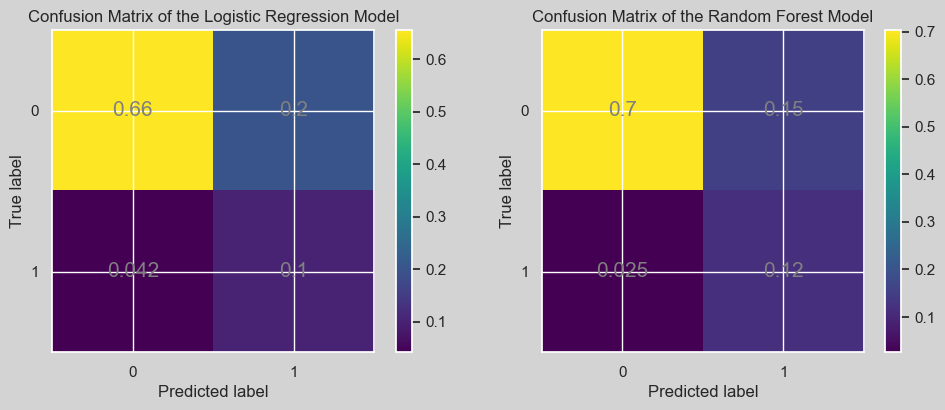

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(ncols=2, figsize=(10,4))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_logis_test, ax=ax[0], normalize="all", text_kw={"color": "grey", "size": 15})
ax[0].set_title("Confusion Matrix of the Logistic Regression Model");


ConfusionMatrixDisplay.from_predictions(y_test,y_pred_tree_test, ax=ax[1], normalize="all", text_kw={"color": "grey", "size": 15})
ax[1].set_title("Confusion Matrix of the Random Forest Model");

plt.tight_layout()

In [88]:
from sklearn.metrics import classification_report

print("Logitic Regression Model:")
print(classification_report(y_test, y_pred_logis_test, zero_division=True))

print("\nRandom Forest Model:")
print(classification_report(y_test, y_pred_tree_test, zero_division=True))


Logitic Regression Model:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       572
           1       0.33      0.71      0.45        95

    accuracy                           0.76       667
   macro avg       0.64      0.73      0.65       667
weighted avg       0.85      0.76      0.79       667


Random Forest Model:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       572
           1       0.43      0.82      0.57        95

    accuracy                           0.82       667
   macro avg       0.70      0.82      0.73       667
weighted avg       0.89      0.82      0.84       667



In [90]:
best_model_logis.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [89]:
best_model_tree.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [102]:
def standardized(X):
    mean, std = X.agg(["mean", "std"])

    return (X - mean) / std

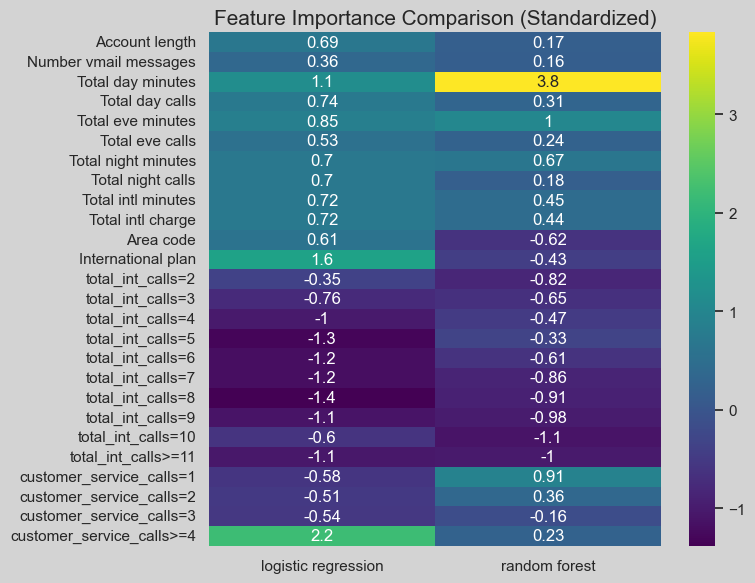

In [124]:
tree_importance = pd.Series(best_model_tree.feature_importances_, index=best_model_tree.feature_names_in_)

logis_importance = pd.Series(best_model_logis.coef_[0], index=best_model_tree.feature_names_in_)

df_import = pd.DataFrame({'logistic regression' : logis_importance, 'random forest': tree_importance})
df_import = df_import.apply(standardized, axis=0)

plt.figure(figsize=(8,6))
sns.heatmap(
    df_import,
    annot=True,
    cmap="viridis"
)

plt.title("Feature Importance Comparison (Standardized)", size=15)
plt.tight_layout();

---

## Neural Network

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, TensorDataset

X_resampled_tensor = torch.from_numpy(X_resampled.values).float()

y_resampled_tensor = torch.from_numpy(y_resampled.values).long()

resampled_dataset = TensorDataset(X_resampled_tensor, y_resampled_tensor)

batch_size = 32
resampled_dataloader = DataLoader(resampled_dataset, batch_size=batch_size, shuffle=True)

first_batch_X, first_batch_y = next(iter(resampled_dataloader))

print("\nShapes from the new DataLoader (containing resampled data):")
print("Shape of X batch:", first_batch_X.shape)
print("Shape of y batch:", first_batch_y.shape)


Shapes from the new DataLoader (containing resampled data):
Shape of X batch: torch.Size([32, 26])
Shape of y batch: torch.Size([32])


In [126]:
X_test_tensor = torch.from_numpy(X_test.values).float()

y_test_tensor = torch.from_numpy(y_test.values).long()

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [127]:
input_n = first_batch_X.shape[-1]

In [265]:
import torch.nn as nn
import torch
import torch.optim as optim
from torchinfo import summary


torch.manual_seed(42)


model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_n, 512),
    nn.ReLU(),
    torch.nn.Dropout(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Linear(128, 32),
    nn.ReLU(),
    torch.nn.Dropout(),
    nn.Linear(32, 2),
)

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.0001)

summary(model, input_size=(batch_size, input_n))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 2]                   --
├─Flatten: 1-1                           [32, 26]                  --
├─Linear: 1-2                            [32, 512]                 13,824
├─ReLU: 1-3                              [32, 512]                 --
├─Dropout: 1-4                           [32, 512]                 --
├─Linear: 1-5                            [32, 128]                 65,664
├─ReLU: 1-6                              [32, 128]                 --
├─Linear: 1-7                            [32, 32]                  4,128
├─ReLU: 1-8                              [32, 32]                  --
├─Dropout: 1-9                           [32, 32]                  --
├─Linear: 1-10                           [32, 2]                   66
Total params: 83,682
Trainable params: 83,682
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 2.68
Input size (MB): 0.00
Forward/back

In [267]:
from tqdm.notebook import tqdm

def score(model, val_loader, loss_fn, device="cpu"):
    model.eval()

    total_loss = 0.0
    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            loss = loss_fn(outputs, targets.to(torch.long))
            total_loss += loss.item() * inputs.size(0)

            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    avg_loss = total_loss / len(val_loader.dataset)
    accuracy = accuracy_score(all_targets, all_predictions)

    model.train()

    return avg_loss, accuracy

def train_epoch(model, optimizer, loss_fn, data_loader, device="cpu"):
    training_loss = 0.0

    model.train()

    for inputs, targets in tqdm(data_loader, desc="Training", leave=False):
        optimizer.zero_grad()

        inputs = inputs.to(device)
        targets = targets.to(device)

        output = model(inputs)
        loss = loss_fn(output, targets)

        loss.backward()
        optimizer.step()

        training_loss += loss.data.item() * inputs.size(0)

    return training_loss / len(data_loader.dataset)


def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=20, device="cpu"):
    for epoch in range(1, epochs + 1):
        training_loss = train_epoch(model, optimizer, loss_fn, train_loader, device)

        validation_loss, validation_accuracy = score(model, val_loader, loss_fn, device)

        print(
            f"Epoch: {epoch}, Training Loss: {training_loss:.2f}, "
            f"Validation Loss: {validation_loss:.2f}, Validation accuracy = {validation_accuracy:.2f}"
        )

In [ ]:
torch.manual_seed(42)


model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_n, 512),
    nn.ReLU(),
    torch.nn.Dropout(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Linear(128, 32),
    nn.ReLU(),
    torch.nn.Dropout(),
    nn.Linear(32, 2),
)

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
train(model, optimizer, loss_fn, resampled_dataloader, test_dataloader)

In [271]:
np.random.seed(42)

class LayerDense:
  def __init__(self, n_in, n_out, activation=None, loss_func=None):
    self.weights = np.random.randn(n_in, n_out) * np.sqrt(2/n_in)
    self.bias = np.zeros((1, n_out))
    self.activation = activation
    self.loss_func = loss_func

    self.vW = np.zeros((n_in, n_out))
    self.vb = np.zeros((1, n_out))

    
  def forward(self, input):
    self.input = input
    self.z = input @ self.weights + self.bias
    if self.activation:
      self.a = self.activation.forward(self.z)
    else:
       self.a = self.z

  def calc_loss(self, y_true):
    self.loss = self.loss_func.calculate(y_true,self.a)

  def backward(self, gradient):
    if self.activation:
      gradient = self.activation.backward(gradient)

    m = gradient.shape[0]
    self.dw = (self.input.T @ gradient) / m

    self.db = np.sum(gradient, axis=0, keepdims=True) / m

    self.dinput = (gradient @ self.weights.T) 

    return self.dinput
    
  def update(self, lr=0.01):
    self.weights -= lr*self.dw
    self.bias -= lr*self.db

  def predict(self, input):
    z = input @ self.weights + self.bias
    if self.activation:
      return self.activation.forward(z)
    else:
      return z

  def evaluate(self, X, y_true):
    z = X @ self.weights + self.bias
    if self.activation:
      a = self.activation.forward(z)
    else:
      a = z

    if self.loss_func:
      loss = self.loss_func.calculate(y_true, a)
      return loss
    else:
      return a
# def update(self, lr=0.01, momentum=0.9):
#     self.vW = momentum * self.vW - lr * self.weights
#     self.vb = momentum * self.vb - lr * self.db
    
#     # Apply the velocity updates to the parameters
#     self.weights += self.vW
#     self.bias += self.vb
class Activation:
  class ReLU:
    def __init__(self):
      pass

    def forward(self, input):
      self.z = input
      return np.maximum(0, input)
    
    def backward(self, dvalue):
      return dvalue * (self.z > 0)

  class SoftMax:
    def __init__(self):
      pass
    def forward(self, input):
      x = input - np.max(input, axis=1, keepdims=True)
      num = np.exp(x)
      denom = np.sum(num, axis=1, keepdims=True)

      return num / denom
    
    def backward(self, dvalue):
      return dvalue
    

class Loss:
  class CCE:
    def __init__(self):
      pass
    def calculate(self, y_true, y_pred):
        samples = len(y_pred)
        if len(y_true.shape) == 1:
            num_classes = y_pred.shape[1]
            y_true_one_hot = np.zeros((samples, num_classes))
            y_true_one_hot[np.arange(samples), y_true] = 1
            y_true = y_true_one_hot
        
        epsilon = 1e-12
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        
        return -np.mean(y_true * np.log(y_pred), dtype=float)
    
    def backward(self, y_true, y_pred):
        samples = len(y_pred)
        
        if len(y_true.shape) == 1:
            num_classes = y_pred.shape[1]
            y_true_one_hot = np.zeros((samples, num_classes))
            y_true_one_hot[np.arange(samples), y_true] = 1
            y_true = y_true_one_hot
        
        self.dinput = (y_pred - y_true) / samples
        return self.dinput